In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

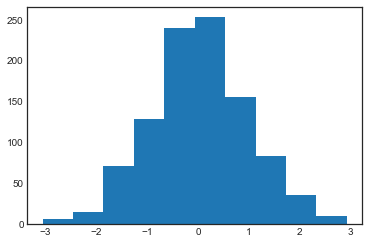

In [2]:
# Basic Histograms
data = np.random.randn(1000)
plt.hist(data);

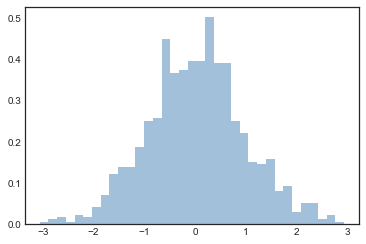

In [16]:
# Options for Histograms
# bins -> num of bins
# histtype -> The type of histogram to draw. histtype='stepfilled' 
# alone with some transparency alpha to be very useful when comparing histograms of several distributions

plt.hist(data, bins = 35, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none');

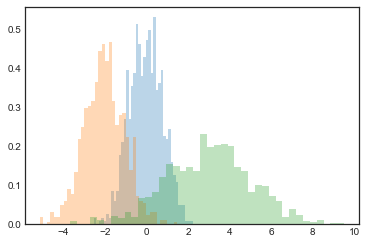

In [20]:
# Over-plotting multiple histograms
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins = 40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [22]:
# Compue the histogram
counts, bin_edges = np.histogram(data, bins=35)
print(counts);

[ 1  2  3  1  4  3  7 12 21 24 24 32 43 44 77 63 64 68 68 86 67 67 43 38 26
 25 27 14 16  5  9  9  2  4  1]


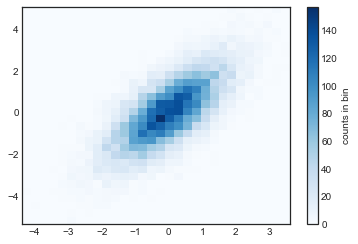

In [27]:
# Two-Dimensional Histograms and Binnings
mean = [0, 0]            # Mean of the N-dimensional distribution 
cov = [[1, 1], [1, 2]]   # Covariance matrix 
x, y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()                #colorbar()
cb.set_label('counts in bin');     # set color bar label

In [30]:
# Compue Two-Dimensional the histogram
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
# print(counts)
# print(xedges)
# print(yedges);

# For the generalization of this histogram binning in dimensions higher than 2,
# see the np.histogramdd function.

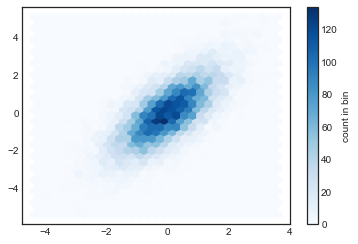

In [32]:
# plt.hexbin: Hexagonal binnings(六角的bingings)
plt.hexbin(x, y, gridsize=30, cmap="Blues")
cb = plt.colorbar(label = 'count in bin')


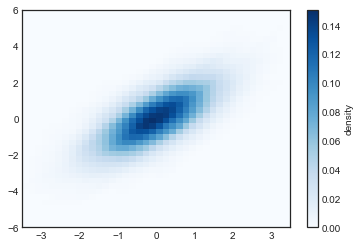

In [34]:
# Kernel Density Estimation
from scipy.stats import gaussian_kde
data = np.vstack([x, y])   # tack arrays in sequence vertically (row wise).
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto', extent=[-3.5, 3.5, -6, 6], cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")